<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization**


Estimated time needed: **30** minutes


In this lab, you will learn how to visualize and interpret data


## Objectives


*   Import Libraries
*   Lab Exercises
    *   Identifying duplicates
    *   Plotting Scatterplots
    *   Plotting Boxplots


***


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

Import the libraries we need for the lab


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# from js import fetch
# import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
# resp = await fetch(URL)
# ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

Read in the csv file from the url using the request library


In [5]:
ratings_df = pd.read_csv(URL)

## Lab Exercises


### Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.


Identify all duplicate cases using prof variable - find the unique values of the prof variables


In [7]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69], dtype=int64)

Print out the number of unique values in the prof variable


In [9]:
ratings_df.prof.nunique()

94

Using all observations, Find the average and standard deviation for age


In [11]:
ratings_df['age'].mean()

48.365010799136066

In [13]:
ratings_df['age'].std()

9.802742037864821

Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

> first we drop duplicates using prof as a subset and assign it a new dataframe name called no_duplicates_ratings_df


In [25]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset =['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


> Use the new dataset to get the mean of age


In [28]:
no_duplicates_ratings_df['age'].mean()

47.5531914893617

In [30]:
no_duplicates_ratings_df['age'].std()

10.25651329515495

### Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.


In [33]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


Find the average teaching evaluation in both groups of upper and lower-division


In [36]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()

Plot the barplot using the seaborn library


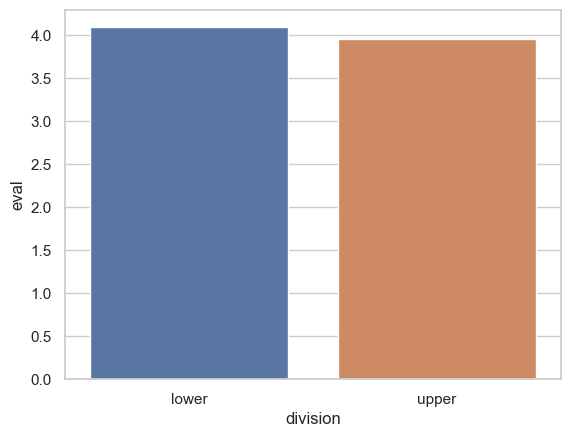

In [39]:
sns.set(style="whitegrid")
ax = sns.barplot(x="division", y="eval", data=division_eval)
plt.show()

### Plot the relationship between age and teaching evaluation scores.


Create a scatterplot with the scatterplot function in the seaborn library


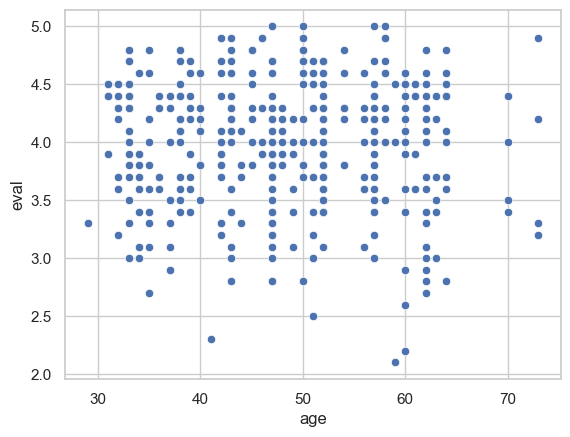

In [41]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)
plt.show()

### Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.


Create a scatterplot with the scatterplot function in the seaborn library this time add the <code>hue</code> argument


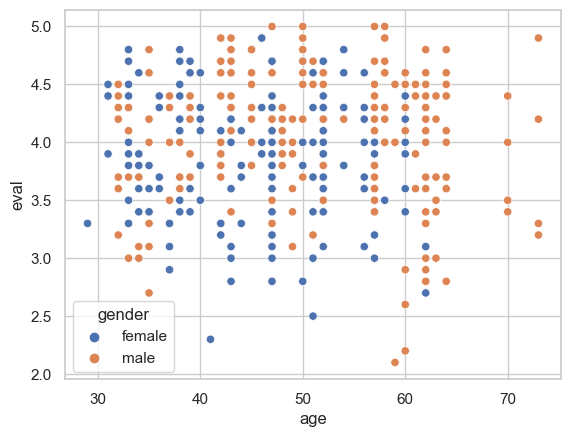

In [43]:
ax = sns.scatterplot(x='age', y='eval', hue='gender',
                     data=ratings_df)
plt.show()

### Create a box plot for beauty scores differentiated by credits.


We use the <code>boxplot()</code> function from the seaborn library


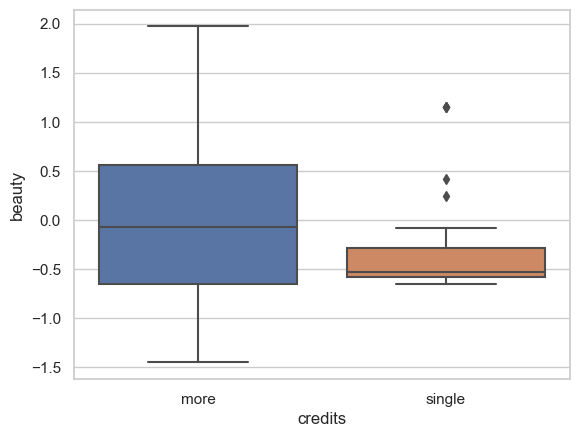

In [45]:
ax = sns.boxplot(x='credits', y='beauty', data=ratings_df)
plt.show()

### What is the number of courses taught by gender?


We use the <code>catplot()</code> function from the seaborn library


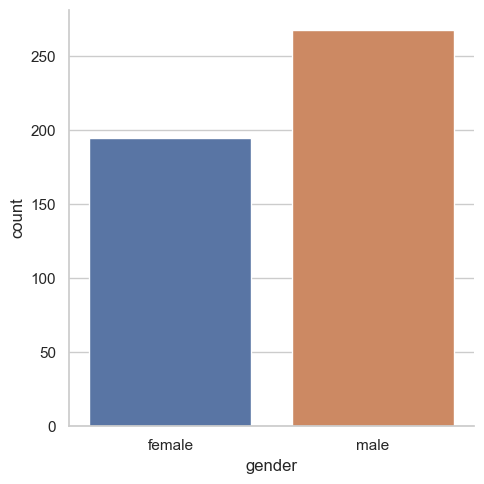

In [47]:
sns.catplot(x='gender', kind='count', data=ratings_df)
plt.show()

### Create a group histogram of taught by gender and tenure


We will add the <code>hue = Tenure</code> argument


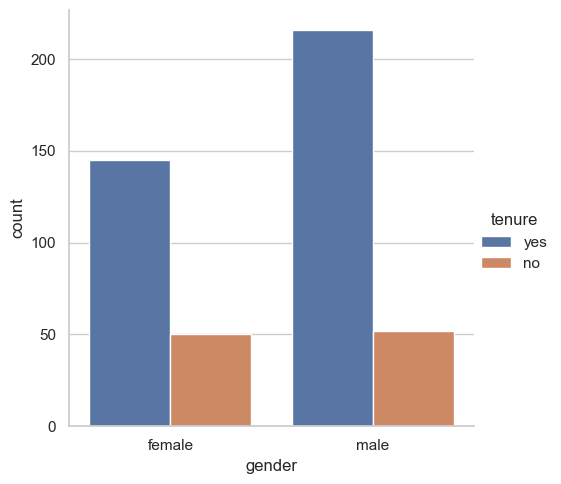

In [49]:
sns.catplot(x='gender', hue = 'tenure', kind='count', data=ratings_df)
plt.show()

### Add division as another factor to the above histogram


We add another argument named <code>row</code> and use the division variable as the row


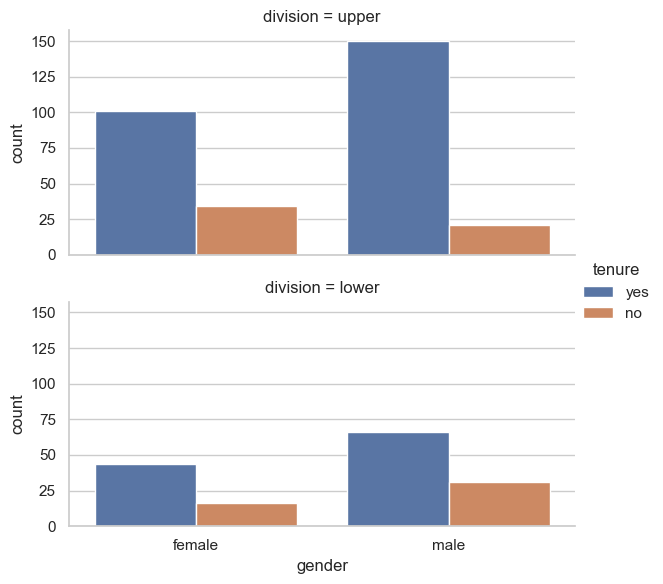

In [51]:
sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=ratings_df,
            height = 3, aspect = 2)
plt.show()

### Create a scatterplot of age and evaluation scores, differentiated by gender and tenure


Use the <code>relplot()</code> function for complex scatter plots


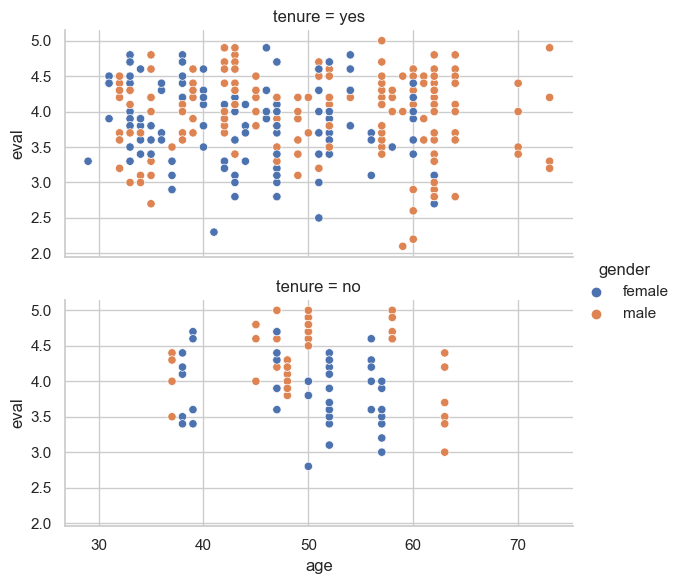

In [53]:
sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)
plt.show()

### Create a distribution plot of teaching evaluation scores


We use the <code>distplot()</code> function from the seaborn library, set <code>kde = false</code> because we don'e need the curve


C:\Users\micha\AppData\Local\Temp\ipykernel_12420\4294337118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ratings_df['eval'], kde = False)


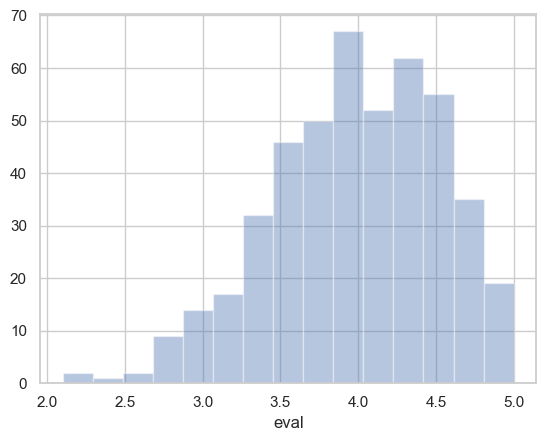

In [55]:
ax = sns.distplot(ratings_df['eval'], kde = False)
plt.show()

### Create a distribution plot of teaching evaluation score with gender as a factor


C:\Users\micha\AppData\Local\Temp\ipykernel_12420\1301340602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False)
C:\Users\micha\AppData\Local\Temp\ipykernel_12420\1301340602.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

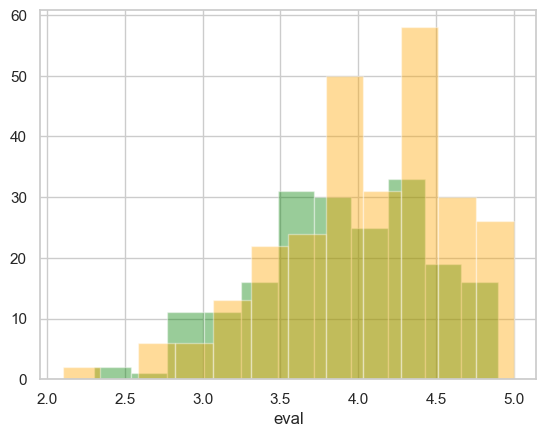

In [57]:
## use the distplot function from the seaborn library
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False) 
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="orange", kde=False) 
plt.show()

### Create a box plot - age of the instructor by gender


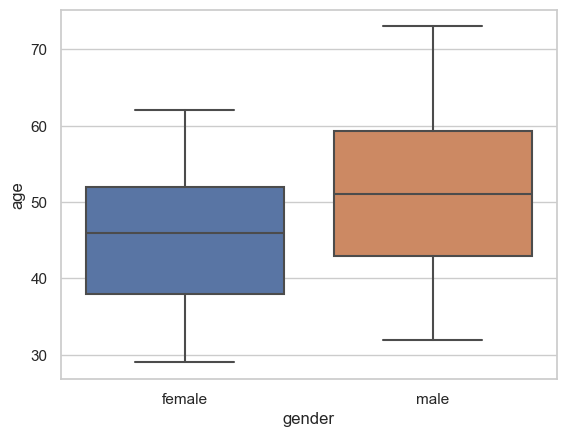

In [59]:
ax = sns.boxplot(x="gender", y="age", data=ratings_df)
plt.show()


### Compare age along with tenure and gender


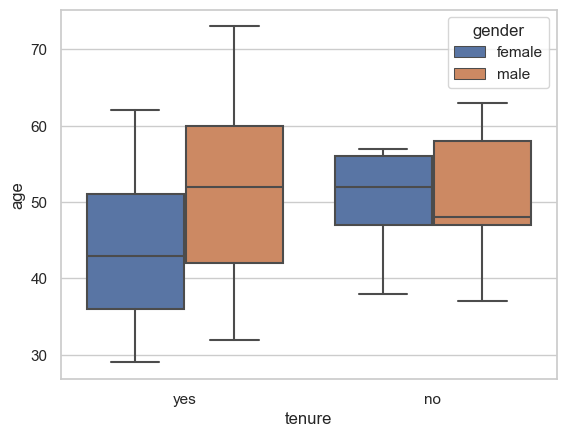

In [61]:
ax = sns.boxplot(x="tenure", y="age", hue="gender",
                 data=ratings_df)
plt.show()

## Practice Questions


### Question 1: Create a distribution plot of beauty scores with Native English speaker as a factor

*   Make the color of the native English speakers plot - orange and non - native English speakers - blue


C:\Users\micha\AppData\Local\Temp\ipykernel_12420\461021309.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df[ratings_df['native']=='yes']['beauty'], color='blue', kde=False)
C:\Users\micha\AppData\Local\Temp\ipykernel_12420\461021309.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

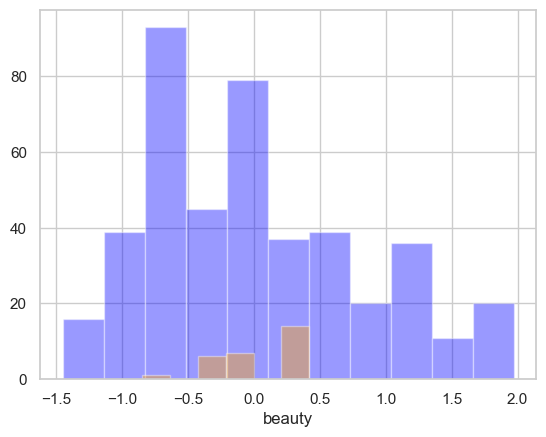

In [74]:
# insert code
sns.distplot(ratings_df[ratings_df['native']=='yes']['beauty'], color='blue', kde=False) 
sns.distplot(ratings_df[ratings_df['native']=='no']['beauty'], color="orange", kde=False) 
plt.show()


Double-click **here** for the solution.

<!-- The answer is below:
sns.distplot(ratings_df[ratings_df['native'] == 'yes']['beauty'], color="orange", kde=False) 
sns.distplot(ratings_df[ratings_df['native'] == 'no']['beauty'], color="blue", kde=False) 
plt.show()
-->


### Question 2: Create a Horizontal box plot of the age of the instructors by visible minority


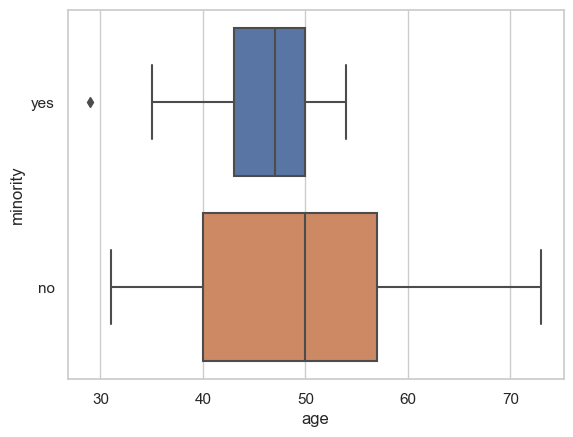

In [76]:
## insert code
ax = sns.boxplot(x="age", y="minority", data=ratings_df)
plt.show()

Double-click **here** for a hint.

<!-- The hint is below:
Remember that the positions of the argument determine whether it will be vertical or horizontal
-->


Double-click **here** for the solution.

<!-- The answer is below:
ax = sns.boxplot(x="age", y="minority", data=ratings_df)
plt.show()
-->


### Question 3: Create a grouped bar plot of tenure by minority and add the gender factor


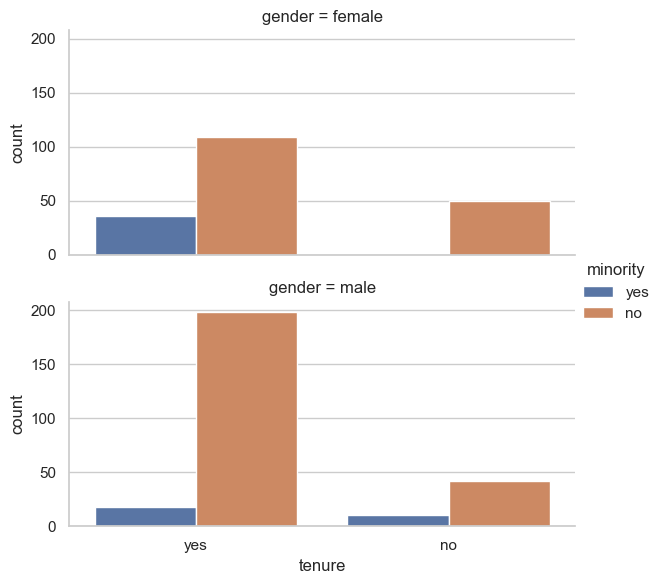

In [78]:
## insert code
sns.catplot(x='tenure', hue = 'minority', row = 'gender',
            kind='count', data=ratings_df,
            height = 3, aspect = 2)
plt.show()

Double-click **here** for the solution.

<!-- The answer is below:
sns.catplot(x='tenure', hue = 'minority', row = 'gender',
            kind='count', data=ratings_df,
            height = 3, aspect = 2)
plt.show()
-->


### Question 4: Create a boxplot of the age variable


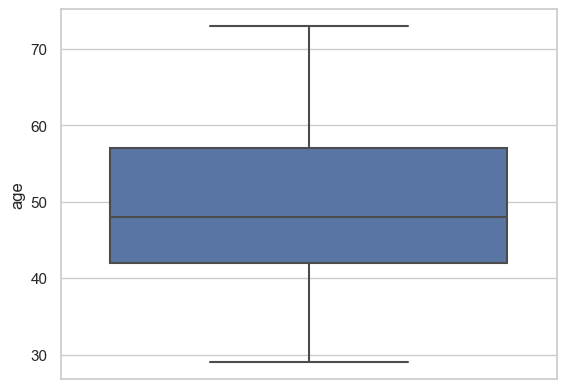

In [83]:
## insert code
ax = sns.boxplot(y="age", data=ratings_df)
plt.show()

Double-click **here** for the solution.

<!-- The answer is below:
## you only habve to specify the y-variable
ax = sns.boxplot(y="age", data=ratings_df)
plt.show()
-->


## Authors

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


<hr>

## <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
